# Dynamical System

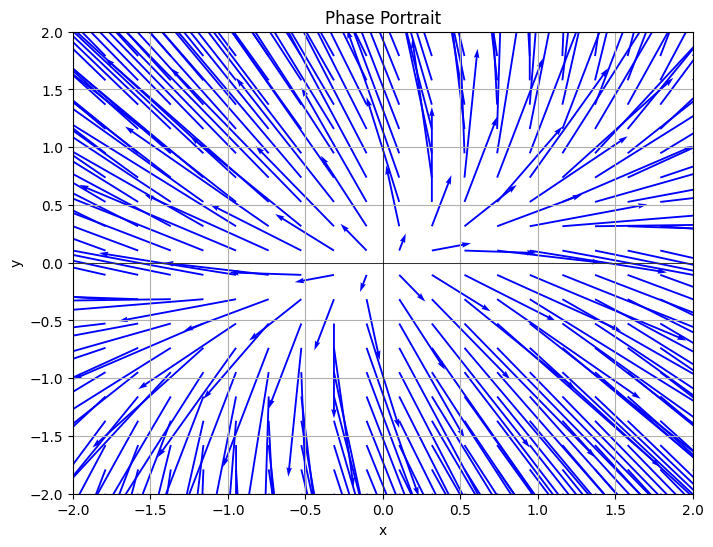

In [78]:
import numpy as np
import matplotlib.pyplot as plt

# Define the system functions
def phi(x, y):
    return 0.5*x + -0.3*y

def psi(x, y):
    return -0.2*x + 0.9*y

# Create a grid of x and y values
x_vals = np.linspace(-2, 2, 20)
y_vals = np.linspace(-2, 2, 20)
X, Y = np.meshgrid(x_vals, y_vals)

# Calculate the derivatives using the system functions
X_dot = phi(X, Y)
Y_dot = psi(X, Y)

# Create a quiver plot
plt.figure(figsize=(8, 6))
plt.quiver(X, Y, X_dot, Y_dot, angles='xy', scale_units='xy', scale=0.5, color='blue')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Phase Portrait')
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.grid()
plt.xlim([-2, 2])
plt.ylim([-2, 2])
plt.show()


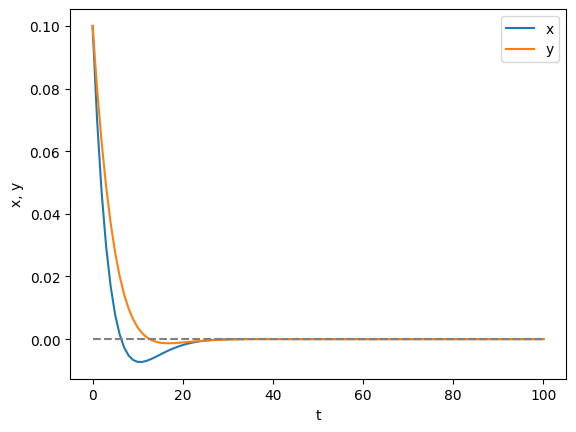

In [79]:
# illustrate the dynamics of the system and print the results

import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from scipy.optimize import fsolve

# parameters
a = 0.9
b = -0.2
c = 0.1
d = 0.7

# Define the system functions
def phi(x, y):
    return a*x + b*y

def psi(x, y):
    return c*x + d*y

x = [0.1]
y = [0.1]
t = [0]

for i in range(100):
    t.append(t[i] + 1)
    x.append(phi(x[i], y[i]))
    y.append(psi(x[i], y[i]))

# plot
plt.plot(t, x, label='x')
plt.plot(t, y, label='y')
plt.xlabel('t')
plt.ylabel('x, y')
plt.hlines(0, 0, 100, colors='grey', linestyles='dashed')
plt.legend()

plt.show()

# Cobweb Model

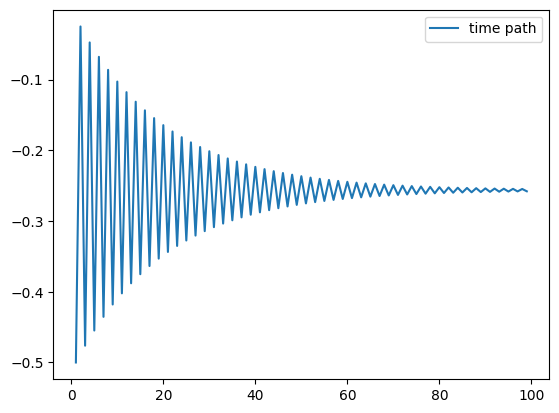

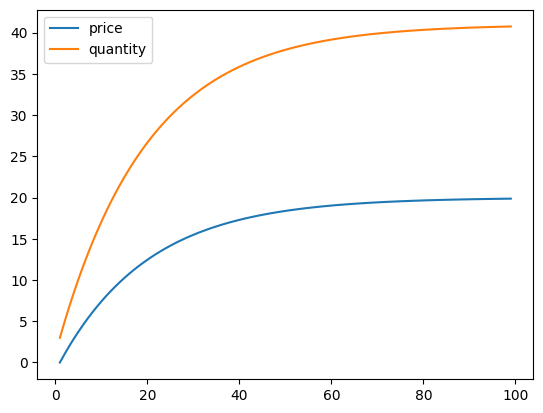

In [80]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sym

'''
given variables
a0: intercept of the demand curve(+ve) #gamma
b0: slope of the demand curve(-ve) #delta
a1: intercept of the supply curve(-ve) # N*alpha/(2*beta)) 
b1: slope of the supply curve(+ve) # N/(2*beta)
t: period
x0: period0 price

generated variables
x1: period1 price
pp: intertemporal eqm price
time_path: time path
dd: eqm demand
ss: eqm supply
in eqm condition dd and ss should and would be the same
'''

x0= sym.symbols('x0')
a0= sym.symbols('a0')
a1= sym.symbols('a1')
b0= sym.symbols('b0')
b1= sym.symbols('b1')
p0= sym.symbols('p0')
q0= sym.symbols('q0')
t= sym.symbols('t')

x1= (a1- a0)- (b1/b0)*x0
dd= a0+ b0*x1
ss= a1 + b1*x0
pp= -((a0-a1)/(b0-b1))
time_path_fn= ((p0- pp)*(b0/b1)**-t)+ pp
qq = a0 - b0 * x1

time_path=[]
solve= []
t1= list(range(1, 100))
x= 0
bi_pasa0= []
bi_qasa0= []
bi_pasa1= []
d=[]
s=[]

val_set1 = [1, -2, 2, 1.9, 0]
val_set2 = [2, -2, 5, 1.5, 4]

for i in t1:
  values= [1, -2, 2, 1.9, 0]
  x_1= x1.subs([(x0, x), (a0, values[0]), (b0, values[1]), (a1, values[2]), (b1, values[3])])
  op= time_path_fn.subs([(x0, x), (a0, values[0]), (b0, values[1]), (a1, values[2]), (b1, values[3]), (p0, values[4]), (t, i)])
  time_path.append(op)
  d.append(dd.subs([(x1, x_1), (a0, values[0]), (b0, values[1]), (a1, values[2]), (b1, values[3])]))
  s.append(ss.subs([(x0, x), (a0, values[0]), (b0, values[1]), (a1, values[2]), (b1, values[3])]))
  q= qq.subs([(x1, x_1), (a0, values[0]), (b0, values[1]), (a1, values[2]), (b1, values[3])])
  bi_pasa0.append(x)
  bi_pasa1.append(x_1)
  bi_qasa0.append(q)
  x= x_1
plt.plot(t1, time_path, label= 'time path')
plt.legend()
plt.show()
plt.plot(t1, bi_pasa0, label= 'price')
plt.plot(t1, bi_qasa0, label= 'quantity')
plt.legend()
plt.show()
# plot of demand and supply

# Sydneaster Cobweb

In [81]:
import numpy as np
import matplotlib.pyplot as plt

n = 100
T = np.arange(n)
q = np.zeros(n)
p = np.zeros(n)
S = np.zeros(n)
D = np.zeros(n)

# parameters
alpha = 2
beta = -2
gamma = 5
delta = 1.5
N = 3

# params
a = N / (2 * beta * delta)
b = (alpha * N + 2 * beta * gamma) / (2*beta*gamma)

# function to cal p
def cal_q(p):
    return (p-alpha)/(2*beta)

def cal_S(p):
    return N*(p-alpha)/(2*beta)

def cal_D(p):
    return gamma - delta*p

# initial values

T[0] = 0
q[0] = 0.5
p[0] = 1
D[0] = cal_D(p[0])
S[0] = cal_S(p[0])

# equilibrium
pp = b/(1-a)
qq = cal_q(pp)

# simulation
for t in range(1, n):
    T[t] = t
    p[t] = pp + (-a)**t * (p[0] - pp)
    q[t] = cal_q(p[t])
    S[t] = cal_S(p[t])
    D[t] = cal_D(p[t])

In [82]:
# print
print("a: ", a)
print("b: ", b)
print("pp: ", pp)
print("qq: ", qq)
print("p: ", p)
print("q: ", q)

a:  -0.5
b:  0.7
pp:  0.4666666666666666
qq:  0.38333333333333336
p:  [1.         0.73333333 0.6        0.53333333 0.5        0.48333333
 0.475      0.47083333 0.46875    0.46770833 0.4671875  0.46692708
 0.46679687 0.46673177 0.46669922 0.46668294 0.4666748  0.46667074
 0.4666687  0.46666768 0.46666718 0.46666692 0.46666679 0.46666673
 0.4666667  0.46666668 0.46666667 0.46666667 0.46666667 0.46666667
 0.46666667 0.46666667 0.46666667 0.46666667 0.46666667 0.46666667
 0.46666667 0.46666667 0.46666667 0.46666667 0.46666667 0.46666667
 0.46666667 0.46666667 0.46666667 0.46666667 0.46666667 0.46666667
 0.46666667 0.46666667 0.46666667 0.46666667 0.46666667 0.46666667
 0.46666667 0.46666667 0.46666667 0.46666667 0.46666667 0.46666667
 0.46666667 0.46666667 0.46666667 0.46666667 0.46666667 0.46666667
 0.46666667 0.46666667 0.46666667 0.46666667 0.46666667 0.46666667
 0.46666667 0.46666667 0.46666667 0.46666667 0.46666667 0.46666667
 0.46666667 0.46666667 0.46666667 0.46666667 0.46666667 0.4

# Hyper Inflation

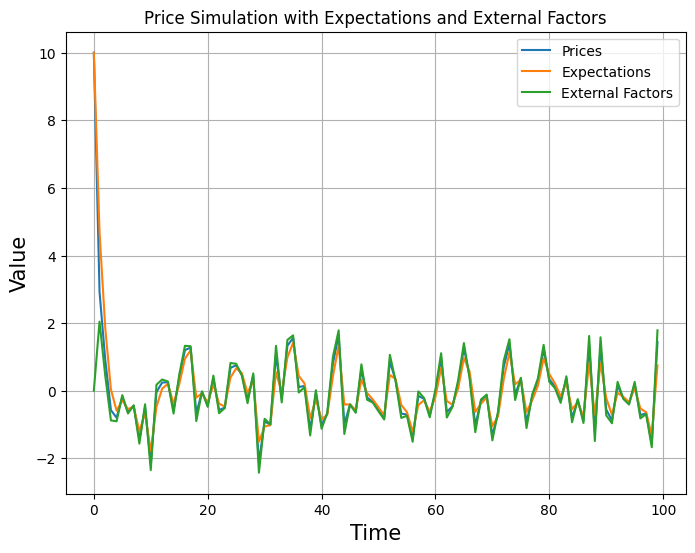

In [83]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
psi = 0.5  # You can adjust this value
alpha = psi / (1 + psi)
beta = 1 / (1 + psi)

# Initial conditions
initial_price = 10  # You can set your own initial price
initial_expectation = initial_price  # Initial expectation for future price
initial_external_factor = 0  # Initial external factor

# Number of periods to simulate
num_periods = 100

# Lists to store simulation results
prices = [initial_price]
expectations = [initial_expectation]
external_factors = [initial_external_factor]

# Simulate the dynamics
for t in range(1, num_periods):
    # Compute new external factor (you can define this based on some pattern or random process)
    external_factor = np.random.normal(0, 1)  # Example: Using normal distribution for randomness

    # Calculate new price expectation and price using the equation
    new_expectation = alpha * expectations[t - 1] + beta * external_factor
    new_price = alpha * new_expectation + beta * external_factor

    # Append results to lists
    expectations.append(new_expectation)
    prices.append(new_price)
    external_factors.append(external_factor)

# Plot the results
plt.figure(figsize=(8, 6))
plt.plot(range(num_periods), prices, label='Prices')
plt.plot(range(num_periods), expectations, label='Expectations')
plt.plot(range(num_periods), external_factors, label='External Factors')
plt.xlabel('Time', fontsize=15)
plt.ylabel('Value', fontsize=15)
plt.title('Price Simulation with Expectations and External Factors')
plt.legend()
plt.grid(True)
plt.show()


# Neoclassical Growth

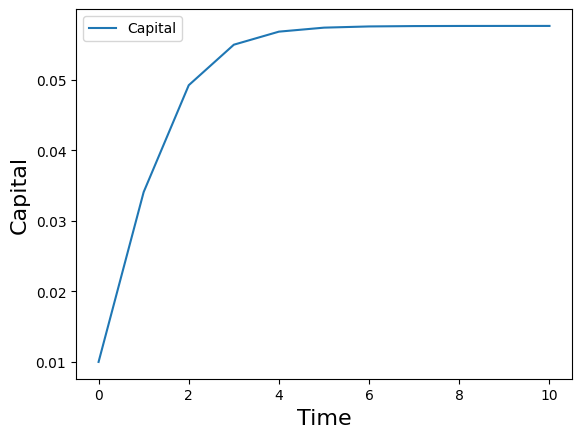

[0.01       0.0340714  0.04921607 0.05495688 0.05680631 0.05737318
 0.05754434 0.05759579 0.05761123 0.05761587 0.05761726]


In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
alpha = 0.3
beta = 0.99**30
gamma = 0.271
phi = 0.15
T = 10  # Number of periods

# Initial conditions
K0 = 10
N0 = 1000
k0 = K0/N0  # Initial capital

# Initialize arrays to store results
k_values = np.zeros(T+1)
s_values = np.zeros(T)
n_values = np.zeros(T)
n_star_values = np.zeros(T)

# Aggregate
K_values = np.zeros(T)
L_values = np.zeros(T)
Y_values = np.zeros(T)
N_values = np.zeros(T)

# some functions
def prod(K, L):
    return K**alpha * L**(1-alpha)

def saving(K, L):
    return (1-alpha) * prod(K, L)

# Simulation loop
k_values[0] = k0
for t in range(T):
    # Fertility equation
    n_star = gamma / (phi * (1 + beta + gamma))
    n_star_values[t] = n_star
    
    # Savings equation
    s_t = (beta / (1 + beta + gamma)) * (1 - alpha) * k_values[t]**alpha
    s_values[t] = s_t
    
    # AGGREGATE


    # Capital equation
    n_t = n_star
    k_next = s_t / n_
    k_values[t+1] = k_next

# Plotting
plt.plot(range(T+1), k_values, label='Capital')
plt.xlabel('Time', fontsize=16)
plt.ylabel('Capital', fontsize=16)
plt.legend()
plt.show()
print(k_values)


In [85]:
import pandas as pd
data = pd.read_csv('/Users/teddi/My Drive/1.1. GPEM Master/SummerCamp2023/data_gdp_growth_china.csv')
df = pd.DataFrame(data)
df

,year,growth_rate,gdp,gdp_pc
0,1960,NaN,59.716252,89.5202
1,1961,-27.2700,50.056688,75.8056
2,1962,-5.5800,47.209188,70.9092
3,1963,10.3000,50.706617,74.3134
4,1964,18.1800,59.708128,85.4982
...,...,...,...,...
58,2018,6.7498,13894.907490,9905.4061
59,2019,5.9505,14279.968490,10143.8602
60,2020,2.2386,14687.743560,10408.7191
61,2021,8.4475,17820.459340,12617.5050


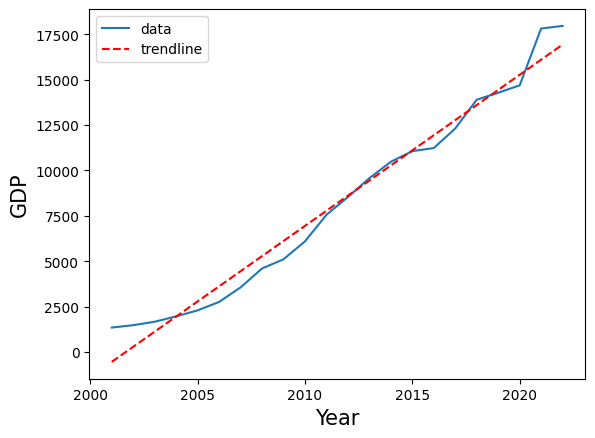

In [86]:
cutoff = 2000
x = df[df['year'] > cutoff]['year']
y = df[df['year'] > cutoff]['gdp']
# plot trend line
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x, y)
plt.plot(x,p(x),"r--")
plt.xlabel('Year', size=15)
plt.ylabel('GDP', size=15)
plt.legend(['data','trendline'])
plt.show()

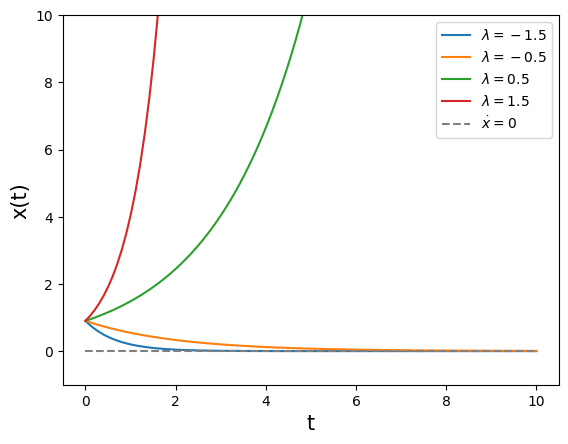

In [87]:
import numpy as np


def ode(lamda, t):
    return x0 * np.exp(lamda * t)

def ode2(lamda, t):
    k = x0 + b/lamda
    return - b/lamda + k * np.exp(lamda * t)

x0 = 0.9 
b = 2

lamdas = [-1.5, -0.5, 0.5, 1.5]
t = np.linspace(0, 10, 100)

for lamda in lamdas:
    plt.plot(t, ode(lamda, t), label=f'$\lambda={lamda}$')
     
plt.hlines(0, 0, 10, linestyles='dashed', colors='gray', label=f'$\dot x=0$')
plt.ylim(-1, 10)
plt.xlabel('t', size=15)
plt.ylabel('x(t)', size=15)
plt.legend()
plt.show()

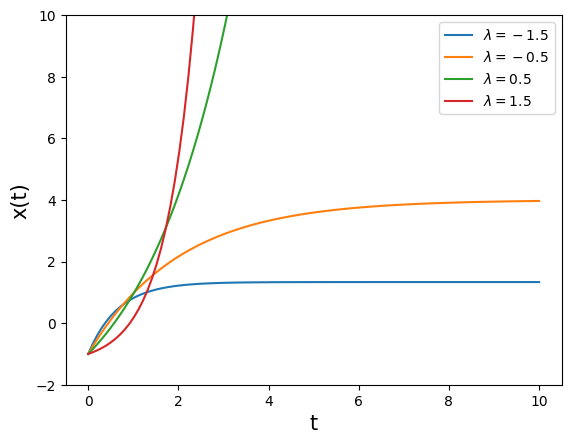

In [88]:
x0 = -1

for lamda in lamdas:
    plt.plot(t, ode2(lamda, t), label=f'$\lambda={lamda}$')
     
plt.xlabel('t', size=15)
plt.ylabel('x(t)', size=15)
plt.ylim(-2, 10)
plt.legend()
plt.show()

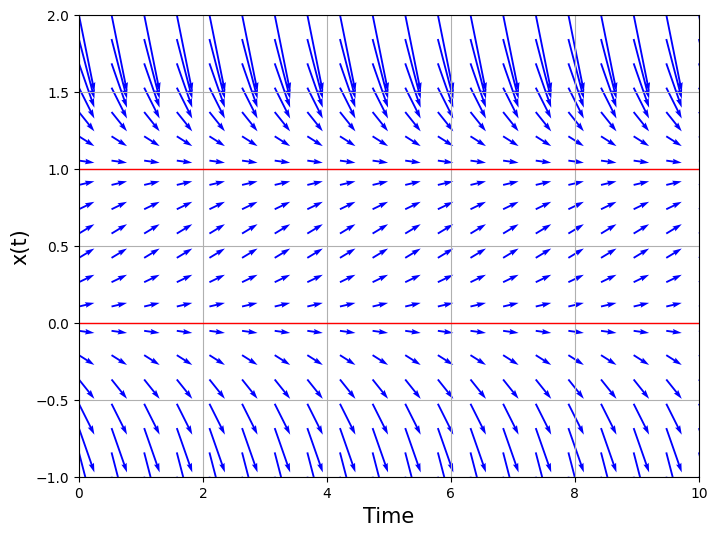

In [89]:
import numpy as np
import matplotlib.pyplot as plt

# Define the differential equation
def dx_dt(x):
    return x * (1 - x)

# Create a grid of x and t values
x_vals = np.linspace(-1, 2, 20)
t_vals = np.linspace(0, 10, 20)

# Create a meshgrid for quiver
X, T = np.meshgrid(x_vals, t_vals)

# Calculate dx/dt for the quiver plot
U = np.ones_like(X)
V = dx_dt(X)

# Plotting the phase diagram with quiver
plt.figure(figsize=(8, 6))
plt.quiver(T, X, U, V, angles='xy', scale_units='xy', scale=4, color='blue')
plt.hlines(1, 0, 10, color='red', linewidth=1)
plt.hlines(0, 0, 10, color='red', linewidth=1)
#plt.title('Phase Diagram of $\\dot{x} = x(1-x)$ with Directional Arrows (Quiver)')
plt.xlabel('Time', size = 15)
plt.ylabel('x(t)', size = 15)
plt.xlim(0, 10)
plt.ylim(-1, 2)
plt.grid()
plt.show()


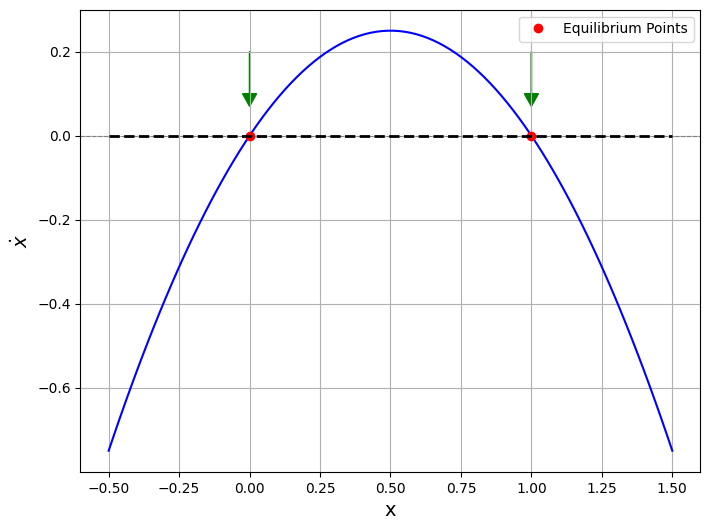

In [90]:
import numpy as np
import matplotlib.pyplot as plt

# Define the differential equation
def dx_dt(x):
    return x * (1 - x)

# Create a range of x values
x_vals = np.linspace(-0.5, 1.5, 100)

# Calculate dx/dt for each x value
dx_dt_vals = dx_dt(x_vals)

# Plotting the phase line with equilibrium points and arrows
plt.figure(figsize=(8, 6))
plt.plot(x_vals, dx_dt_vals, color='blue')
plt.axhline(0, color='gray', linestyle='--', linewidth=0.8)  # Horizontal axis

# Equilibrium points
equilibrium_points = [0, 1]
plt.plot(equilibrium_points, [0, 0], 'ro', label='Equilibrium Points')

# Directional arrows
for x_eq in equilibrium_points:
    plt.arrow(x_eq, 0.2, 0, -0.1, head_width=0.05, head_length=0.03, fc='green', ec='green')

plt.xlabel('x', fontsize=14)
plt.ylabel('$\\dot{x}$', fontsize=14)
plt.hlines(0, -0.5, 1.5, color='black', linestyle='--', linewidth=2)
plt.legend()
plt.grid()
plt.show()


Consumption at k = 1.13 is c = 0.75


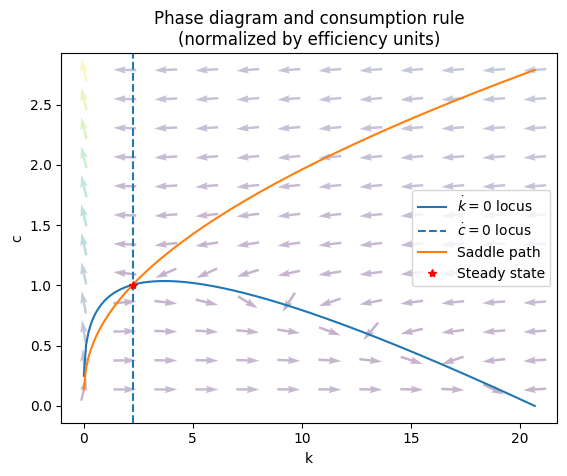

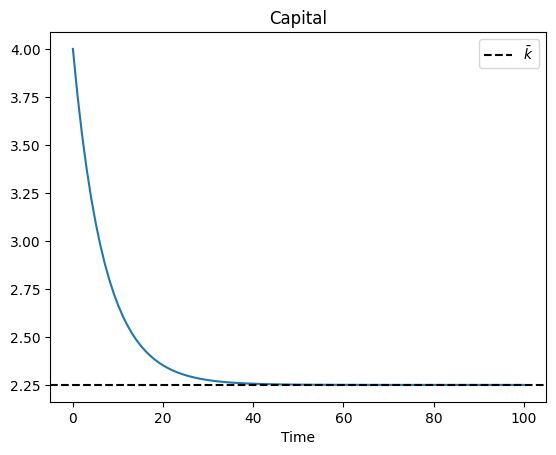

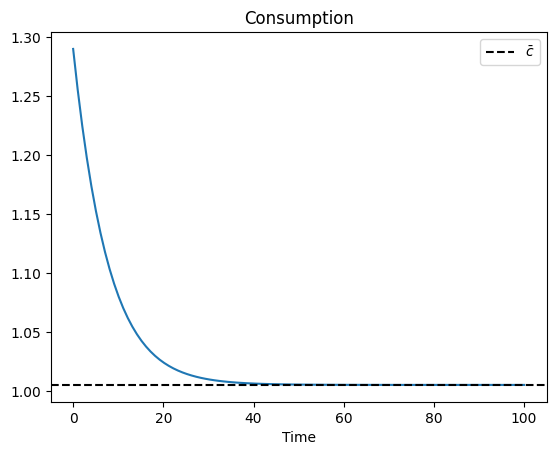

In [91]:
# -*- coding: utf-8 -*-
# ---
# jupyter:
#   jupytext:
#     formats: ipynb,py:percent
#     text_representation:
#       extension: .py
#       format_name: percent
#       format_version: '1.1'
#       jupytext_version: 0.8.5
#   kernelspec:
#     display_name: Python 3
#     language: python
#     name: python3
#   language_info:
#     codemirror_mode:
#       name: ipython
#       version: 3
#     file_extension: .py
#     mimetype: text/x-python
#     name: python
#     nbconvert_exporter: python
#     pygments_lexer: ipython3
#     version: 3.6.6
# ---

# %% [markdown]
# # Numerical Solution of the Ramsey/Cass-Koopmans model
#
# ## Mateo Velásquez-Giraldo
#
# ## (adapted from Alexander Tabarrok and Christopher D. Carroll)
#
#
#
#
#
#
# This notebook implements a class representing Ramsey's growth model. Current utilities include:
# - Numerically finding the consumption rule through 'time elimination', as implemented by Alexander Tabarrok and Christopher D. Carroll's [Wolfram Mathematica notebook](www.econ2.jhu.edu/people/ccarroll/public/LectureNotes/Growth/RamseyNumericSolve.zip).
# - Drawing the phase diagram of the model.
# - Simulating optimal capital dynamics from a given starting point.
#
# A formal treatment of the exact version of the model implemented in this notebook can be found in [Christopher D. Carroll's graduate macroeconomics lecture notes](http://www.econ2.jhu.edu/people/ccarroll/public/LectureNotes/Growth/RamseyCassKoopmans/).
#

# %% {"code_folding": []}
# Preamble
import numpy as np
import matplotlib.pyplot as plt

from scipy.integrate import odeint
from scipy import interpolate

# %% {"code_folding": []}
# Class implementation

class RCKmod:
    """
    A class representing Ramsey/Cass-Koopmans growth models.
    """
    
    def __init__(self,rho,alpha,theta,xi,delta,phi):
        """
        Inputs:
        - rho:   relative risk aversion coefficient for CRRA utility.
        - alpha: capital's share of production in Cobb-Douglas output function.
        - theta: time preference/discount rate.
        - xi:    population growth rate.
        - delta: capital depreciation rate.
        - phi:   labor productivity growth rate.        
        """
        # Assign parameter values
        self.rho = rho
        self.alpha = alpha
        self.theta = theta
        self.xi = xi
        self.delta = delta
        self.phi = phi
        
        # Create empty consumption function
        self.cFunc = None
        
        # Maximum capital
        self.kmax = (1/(self.phi + self.xi + self.delta))**(1/(1-self.alpha))
        
        # Steady state capital
        self.kss = (alpha/(theta + xi + delta + rho*phi))**(1/(1-alpha))
        # Steady state consumption
        self.css = self.kss**alpha - (xi + delta + phi)*self.kss
        
        # Solve the model to create its consumption function
        self.solve()
    
    def output(self,k):
        """
        Cobb-Douglas normalized production function
        """
        return(k**self.alpha)
    
    def dcdt(self,c,k):
        """
        Consumption differential equation
        """
        dc = c/self.rho*(self.alpha*k**(self.alpha - 1) - self.theta - (self.xi + self.delta) -self.rho*self.phi)
        return(dc)
    
    def dkdt(self,c,k):
        """
        Capital differential equation
        """
        dk = self.output(k) - c - (self.phi + self.xi + self.delta)*k
        return(dk)
        
    def dcdk(self,c,k):
        """
        Differential equation for the time elimination method.
        This corresponds to dc/dk = (dc/dt)/(dk/dt)
        """
        return(self.dcdt(c,k)/self.dkdt(c,k))
    
    def solve(self, eps = 10**(-8), npoints = 400):
        """
        Solves for the model's consumption rule through the time elimination method.
        Parameters:
        - eps:     disturbance used to prevent dc/dk from becoming 0/0 at
                   the steady state value of capital.
        - npoints: number of points used on each side of the steady
                   state capital for solving the dc/dk equation.
        """
        # K ranges
        k_below = np.linspace(self.kss,0.0001,npoints)
        k_above = np.linspace(self.kss,self.kmax,npoints)
        k = np.concatenate((k_below,k_above)).flatten()
         
        # Solve for c on each side of the steady state capital,
        # adding a distrubance to prevent dc/dk = 0/0.
        c_below = odeint(self.dcdk, self.css - eps, k_below)
        c_above = odeint(self.dcdk, self.css + eps, k_above)
        c = np.concatenate((c_below,c_above)).flatten()
        
        # Create consumption function as an interpolation of the
        # numerical solutions.
        self.cFunc = interpolate.interp1d(k,c)
    
    
    def dkdt_opt(self,k,t):
        """
        Differential equation for k assuming optimal c decisions.
        """
        return(self.dkdt(self.cFunc(k),k))
    
    
    def k_dynamics(self,k0,t):
        """
        Simulates optimal capital dynamics from a given starting point.
        Parameters:
        - t : vector of time points at which to solve for capital
        - k0: value of capital at t[0]
        """
        k = odeint(self.dkdt_opt, k0, t)
        return(k)
    
    
    def k0locus(self,k):
        """
        Returns the consumption value that leaves a given ammount of
        effective capital unchanged.
        """
        return(self.output(k) - (self.phi + self.xi + self.delta)*k)
        
    def phase_diagram(self, npoints = 200, arrows = False, n_arrows = 5):
        """
        Plots the model's phase diagram.
        - npoints:  number of ticks in the k axis.
        - arrows:   boolean to indicate whether or not to draw arrow
                    grid.
        - n_arrows: controls the number of arrows in the grid
        """
        
        k = np.linspace(0.01,self.kmax,npoints)
        
        # Plot k0 locus
        plt.plot(k,self.k0locus(k),label = '$\\dot{k}=0$ locus')
        # Plot c0 locus
        plt.axvline(x = self.kss,linestyle = '--', label = '$\\dot{c}=0$ locus')
        # Plot saddle path
        plt.plot(k,self.cFunc(k), label = 'Saddle path')
        # Plot steady state
        plt.plot(self.kss,self.css,'*r', label = 'Steady state')
        
        # Add arrows ilustrating behavior in different parts of
        # the diagram.
        # Taken from:
        # http://systems-sciences.uni-graz.at/etextbook/sw2/phpl_python.html
        if arrows:
            x = np.linspace(k[0],k[-1],n_arrows)
            y = np.linspace(self.cFunc(k[0]),self.cFunc(k[-1]),n_arrows)
            
            X, Y = np.meshgrid(x,y)
            dc = self.dcdt(Y,X)
            dk = self.dkdt(Y,X)
            
            M = (np.hypot(dk, dc))
            M[ M == 0] = 1.
            dk /= M
            dc /= M
            plt.quiver(X, Y, dk, dc, M, pivot='mid', alpha = 0.3)
        
        # Labels
        plt.title('Phase diagram and consumption rule\n(normalized by efficiency units)')
        plt.xlabel('k')
        plt.ylabel('c')
        plt.legend()
        plt.show()

# %% [markdown]
# ## _Example_
#
# This is a quick example of how the class is used.
#
# An instance of the model is first created by assigning the required parameter values.
#
# The model needs to be solved in order to find the consumption rule or 'saddle path'.

# %% {"code_folding": []}
# Create and solve model
RCKmodExample = RCKmod(rho = 2,alpha = 0.3,theta = 0.02,xi = 0.01,delta = 0.08,phi = 0.03)
RCKmodExample.solve()

# Test the consumption rule
print('Consumption at k = %1.2f is c = %1.2f' % (RCKmodExample.kss/2, RCKmodExample.cFunc(RCKmodExample.kss/2)))

# %% [markdown]
# The model's phase diagram can then be generated.

# %%
RCKmodExample.phase_diagram(arrows= True, n_arrows = 12)

# %% [markdown]
# The class can also be used to simulate the dynamics of capital given a starting point.

# %% {"code_folding": []}
# Create grid of time points
t = np.linspace(0,100,100)

# Find capital dynamics at the desired time points and with
# a given starting capital
k0 = 4
k = RCKmodExample.k_dynamics(k0,t)

# Plot
plt.plot(t,k)
plt.axhline(y = RCKmodExample.kss,linestyle = '--',color = 'k', label = '$\\bar{k}$')
plt.title('Capital')
plt.xlabel('Time')
plt.legend()
plt.show()

# %% [markdown]
# With capital, the consumption rule can be used to find the dynamics of consumption.

# %% {"code_folding": []}
# Find consumption
c = RCKmodExample.cFunc(k)

# Plot
plt.plot(t,c)
plt.axhline(y = RCKmodExample.css,linestyle = '--',color = 'k', label = '$\\bar{c}$')
plt.title('Consumption')
plt.xlabel('Time')
plt.legend()
plt.show()

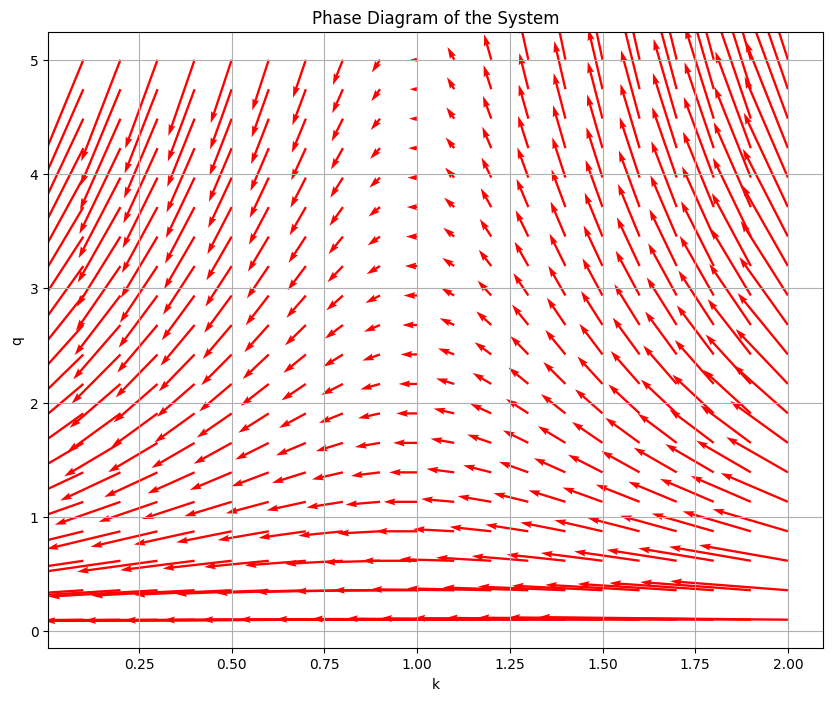

In [92]:
import numpy as np
import matplotlib.pyplot as plt
import scipy

# Parameters
chi = 0.9
r = 0.1

# Define the system of differential equations
def system_eqns(y, t):
    k, q = y
    dk_dt = (q - 1) / chi * k
    dq_dt = r * q - f_prime(k) - 0.5 * chi**(-1) * (q - 1)**2
    return [dk_dt, dq_dt]


# Define the production function derivative
def f_prime(k):
    return 0.3 * 2 * k**(0.3-1)

# Create a grid of k and q values
k_vals = np.linspace(0.1, 5, 20)
q_vals = np.linspace(0.1, 2, 20)

K, Q = np.meshgrid(k_vals, q_vals)

# Calculate the derivatives dk/dt and dq/dt for each point in the grid
dK_dt, dQ_dt = system_eqns([K, Q], 0)

# calculate the equilibrium points
eq_points = []
for i in range(len(k_vals)):
    for j in range(len(q_vals)):
        if dK_dt[i, j] == 0 and dQ_dt[i, j] == 0:
            eq_points.append([k_vals[i], q_vals[j]])

# Plotting the phase diagram with quiver
plt.figure(figsize=(10, 8))
plt.quiver(Q, K, dQ_dt, dK_dt, angles='xy', scale_units='xy', color='red', scale=5)
# plot the equilibrium points
for point in eq_points:
    plt.plot(point[0], point[1], 'bo', ms=10)
plt.xlabel('k')
plt.ylabel('q')
plt.title('Phase Diagram of the System')
plt.grid()
plt.show()


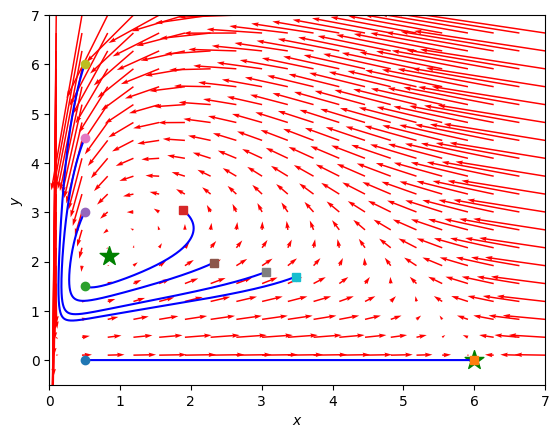

In [93]:
import numpy as np
import matplotlib.pyplot as plt

# Define the Holling-Tanner model
def holling_tanner(Z, t):
    x, y = Z
    dx_dt = x * (1 - x / 6) - 6 * x * y / (8 + 8 * x)
    dy_dt = 0.2 * y * (1 - 0.4 * y / x)
    return dx_dt, dy_dt

x = np.linspace(0.1, 7, 20)
y = np.linspace(0.1, 7, 20)

X, Y = np.meshgrid(x, y)

t = 0

u, v = np.zeros(X.shape), np.zeros(Y.shape)

NI, NJ = X.shape

for i in range(NI):
    for j in range(NJ):
        x = X[i, j]
        y = Y[i, j]
        yprime = holling_tanner([x, y], t)
        u[i,j] = yprime[0]
        v[i,j] = yprime[1]

Q = plt.quiver(X, Y, u, v, color='r', scale=20)

# equilibrium points
epm1 = [6, 0]
epm2 = [0.846, 2.114]



# add some trajectories close to equilibrium points
t = np.linspace(0, 10, 12000)
n = 5
x0 = 0.5 * np.ones(n)
y0 = np.linspace(0, 6, n)
for i in range(n):
    x = x0[i]
    y = y0[i]
    z = odeint(holling_tanner, [x, y], t)
    plt.plot(z[:,0], z[:,1], 'b-') # path
    plt.plot([z[0,0]], [z[0,1]], 'o') # start
    plt.plot([z[-1,0]], [z[-1,1]], 's') # end
 
plt.scatter(epm1[0], epm1[1], marker='*', s=200, c='g')
plt.scatter(epm2[0], epm2[1], marker='*', s=200, c='g')
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.xlim([0, 7])
plt.ylim([-0.5, 7])
plt.show()

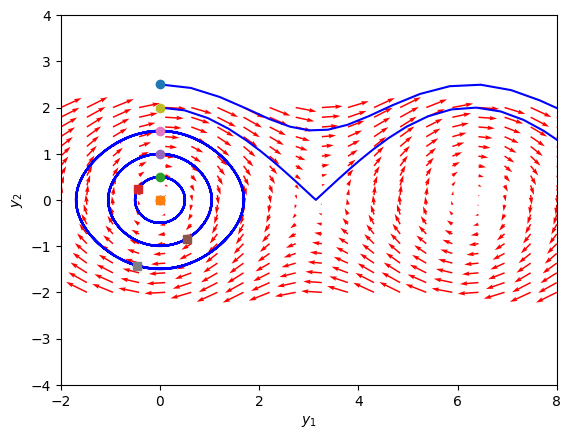

In [94]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

def f(Y, t):
    y1, y2 = Y
    return [y2, -np.sin(y1)]

y1 = np.linspace(-2.0, 8.0, 20)
y2 = np.linspace(-2.0, 2.0, 20)

Y1, Y2 = np.meshgrid(y1, y2)

t = 0

u, v = np.zeros(Y1.shape), np.zeros(Y2.shape)

NI, NJ = Y1.shape

for i in range(NI):
    for j in range(NJ):
        x = Y1[i, j]
        y = Y2[i, j]
        yprime = f([x, y], t)
        u[i,j] = yprime[0]
        v[i,j] = yprime[1]
     

Q = plt.quiver(Y1, Y2, u, v, color='r')

plt.xlabel('$y_1$')
plt.ylabel('$y_2$')
plt.xlim([-2, 8])
plt.ylim([-4, 4])


for y20 in [0, 0.5, 1, 1.5, 2, 2.5]:
    tspan = np.linspace(0, 50, 200)
    y0 = [0.0, y20]
    ys = odeint(f, y0, tspan)
    plt.plot(ys[:,0], ys[:,1], 'b-') # path
    plt.plot([ys[0,0]], [ys[0,1]], 'o') # start
    plt.plot([ys[-1,0]], [ys[-1,1]], 's') # end

plt.show()

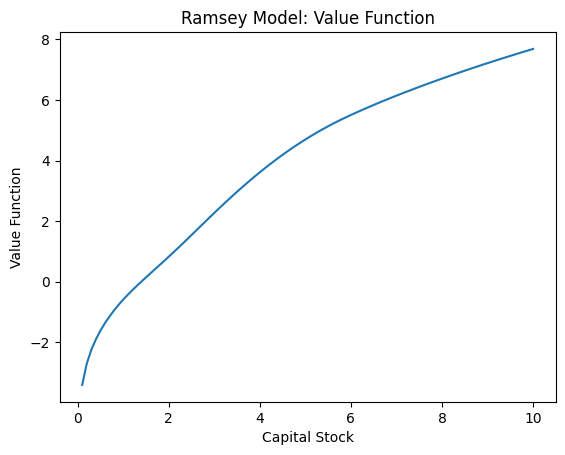

Optimal capital next period at time 10 when current K = 1.10: 1.30
Optimal capital next period at time 10 when current K = 2.10: 2.50
Optimal capital next period at time 10 when current K = 3.10: 3.50
Optimal capital next period at time 20 when current K = 1.10: 1.30
Optimal capital next period at time 20 when current K = 2.10: 2.50
Optimal capital next period at time 20 when current K = 3.10: 3.50
Optimal capital next period at time 30 when current K = 1.10: 1.30
Optimal capital next period at time 30 when current K = 2.10: 2.50
Optimal capital next period at time 30 when current K = 3.10: 3.50


In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Model parameters
beta = 0.95
sigma = 2.0
alpha = 0.36
delta = 0.1
rho = 0.9
sigma_epsilon = 0.02
T = 1000

# Grid for capital stock values
K_min = 0.1
K_max = 10.0
K_size = 100
K = np.linspace(K_min, K_max, K_size)

# Production function
def production(k):
    return k**alpha

# Utility function
def utility(c):
    return np.log(c)

# Initialize value function
V = np.zeros((T+1, K_size))

# Backward induction
for t in range(T - 1, -1, -1):
    for i in range(K_size):
        k = K[i]
        max_value = -np.inf
        for j in range(K_size):
            k_next = K[j]
            c = production(k) + (1 - delta) * k - k_next
            if c > 0:
                future_value = beta * (rho * V[t+1, j] + (1 - rho) * V[t, j])
                current_value = utility(c) + future_value
                if current_value > max_value:
                    max_value = current_value
        V[t, i] = max_value

# Extract policy function
policy = np.zeros((T, K_size), dtype=int)
for t in range(T):
    for i in range(K_size):
        k = K[i]
        max_value = -np.inf
        for j in range(K_size):
            k_next = K[j]
            c = production(k) + (1 - delta) * k - k_next
            if c > 0:
                future_value = beta * (rho * V[t+1, j] + (1 - rho) * V[t, j])
                current_value = utility(c) + future_value
                if current_value > max_value:
                    max_value = current_value
                    policy[t, i] = j

# Plot the final value function
plt.figure()
plt.plot(K, V[0, :])
plt.title("Ramsey Model: Value Function")
plt.xlabel("Capital Stock")
plt.ylabel("Value Function")
plt.show()

# Print policy for some capital stock levels
for t in [10, 20, 30]:
    for k_idx in [10, 20, 30]:
        print(f"Optimal capital next period at time {t} when current K = {K[k_idx]:.2f}: {K[policy[t, k_idx]]:.2f}")


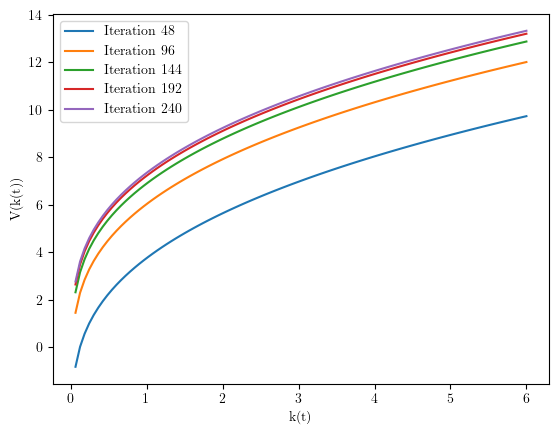

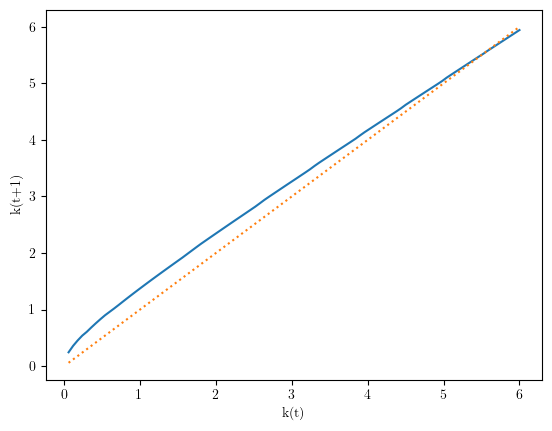

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize_scalar

# latex font
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

# Define global variables
vlast = np.zeros(100)
k0 = np.arange(0.06, 6.06, 0.06)
beta = 0.98
delta = 0.1
theta = 0.36
numits = 240

# Function to calculate the value function
def valfun(k): # k as k'
    global vlast, beta, delta, theta, kt
    g = np.interp(k, k0, vlast)
    c = kt**theta - k + (1 - delta) * kt
    if c <= 0:
        val = -888 - 800 * abs(c)
    else:
        val = np.log(c) + beta * g
    return -val

# Initialize arrays
v = np.zeros(100)
kt1 = np.zeros(100)

# Begin recursive calculations
for its in range(1, numits + 1):
    for j in range(100):
        kt = (j + 1) * 0.06
        ktp1 = minimize_scalar(valfun, bounds=(0.01, 6.2), method='bounded').x
        v[j] = -valfun(ktp1)
        kt1[j] = ktp1

    if its % 48 == 0:
        plt.plot(k0, v, label='Iteration ' + str(its))
        plt.xlabel('k(t)', fontsize=16)
        plt.ylabel('V(k(t))', fontsize=16)
        plt.legend()
        plt.draw()

    vlast = v.copy()

#plt.savefig('valuefun.pdf', format='pdf', dpi=1000)
plt.show()

# Plot the policy function
plt.plot(k0, kt1)
plt.plot(k0, k0, ls=':', label='45 degree line')
plt.xlabel('k(t)', fontsize=16)
plt.ylabel('k(t+1)', fontsize=16)
#plt.savefig('policyfun.pdf', format='pdf', dpi=1000)
plt.show()


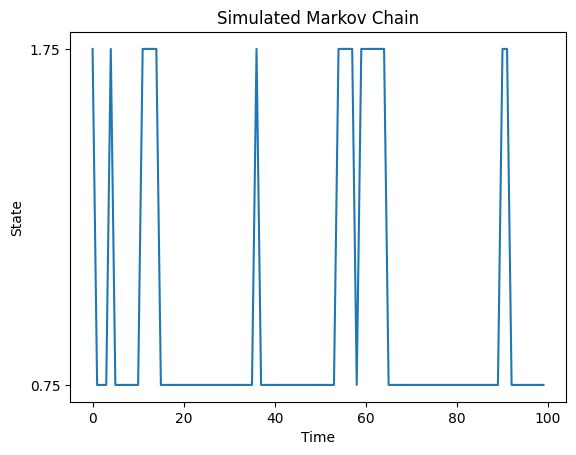

In [5]:
# Markov chain
import numpy as np
import matplotlib.pyplot as plt

A1 = 1.75
A2 = 0.75

p11 = 0.9
p12 = 0.1
p21 = 0.4
p22 = 0.6

# Transition matrix
P = np.array([[p11, p12], [p21, p22]])

# Simulate the Markov chain
T = 100
s = np.zeros(T, dtype=int)
A = np.zeros(T)

s[0] = 0
A[0] = A1

for t in range(1, T):
    s[t] = np.random.choice([0, 1], p=P[s[t-1], :])
    if s[t] == 1:
        A[t] = A1 
    else:
        A[t] = A2

# Plot the simulated Markov chain
plt.figure()
plt.plot(A)
plt.title("Simulated Markov Chain")
plt.xlabel("Time")
plt.ylabel("State")
plt.yticks([A1, A2])
plt.show()

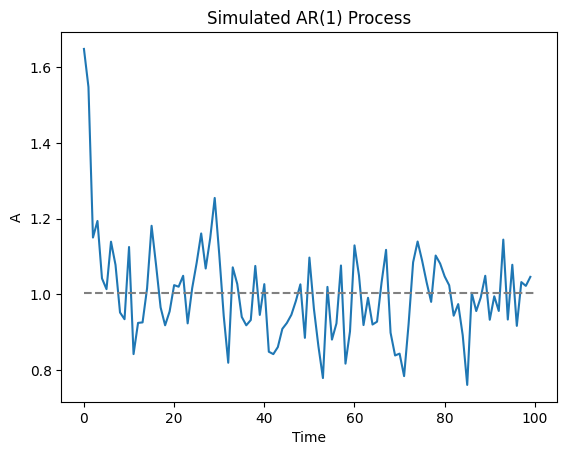

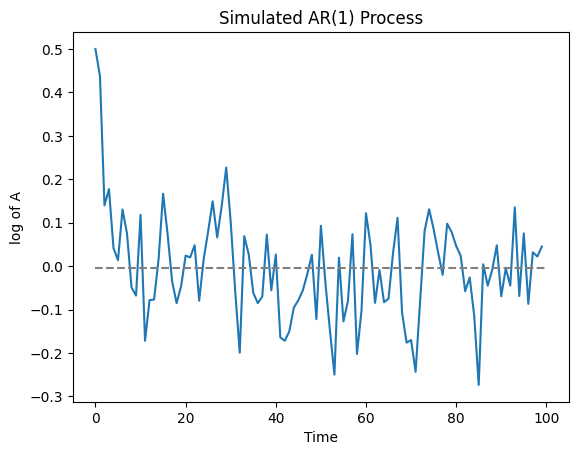

In [18]:
# Simulate an AR(1) Process
import random
# Parameters
rho = 0.5
mu = 0
sigma = 0.1

def inverse_log(y):
    return np.exp(y)


# Simulate the AR(1) process
T = 100
y = np.zeros(T)
A = np.zeros(T)

y[0] = 0.5
A[0] = inverse_log(y[0])

for t in range(1, T):
    y[t] = rho * y[t-1] + random.normalvariate(mu, sigma)
    A[t] = inverse_log(y[t])

# Plot the simulated AR(1) process
plt.figure()
plt.plot(A)
plt.title("Simulated AR(1) Process")
plt.xlabel("Time")
plt.ylabel("A")
# plot the mean
plt.hlines(np.mean(A), 0, T, linestyles='dashed', colors='gray', label='mean')
plt.show()
plt.plot(y)
plt.title("Simulated AR(1) Process")
plt.xlabel("Time")
plt.ylabel("log of A")
# plot the mean
plt.hlines(np.mean(y), 0, T, linestyles='dashed', colors='gray', label='mean')
plt.show()

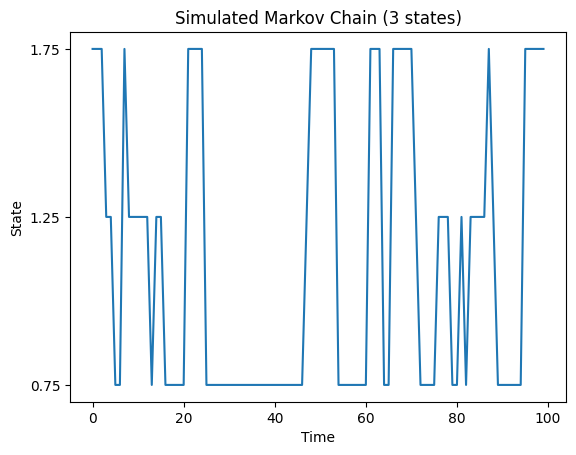

In [22]:
# 3 state Markov process
import numpy as np
import matplotlib.pyplot as plt

A1 = 1.75
A2 = 1.25
A3 = 0.75

p11 = 0.7
p12 = 0.2
p13 = 0.1
p21 = 0.3
p22 = 0.4
p23 = 0.3
p31 = 0.1
p32 = 0.1
p33 = 0.8

# Transition matrix
P = np.array([[p11, p12, p13], [p21, p22, p23], [p31, p32, p33]])

# Simulate the Markov chain
T = 100
s = np.zeros(T, dtype=int)
A = np.zeros(T)

s[0] = 0
A[0] = A1

for t in range(1, T):
    s[t] = np.random.choice([0, 1, 2], p=P[s[t-1], :])
    if s[t] == 0:
        A[t] = A1 
    elif s[t] == 1:
        A[t] = A2
    else:
        A[t] = A3

# Plot the simulated Markov chain
plt.figure()
plt.plot(A)
plt.title("Simulated Markov Chain (3 states)")
plt.xlabel("Time")
plt.ylabel("State")
plt.yticks([A1, A2, A3])
plt.show()


[0.9 1.  1.  0.9 1.  0.9 0.9 1.  1.1 1.1 1.1 1.1 1.1 1.  1.1 1.1 1.1 1.1
 1.1 1.1 1.1 0.9 1.1 1.1 1.1 1.1 0.9 0.9 0.9 1.  1.  1.  1.  0.9 0.9 0.9
 1.1 1.1 1.1 1.1 1.1 1.1 1.1 1.1 1.1 0.9 1.  1.  1.  1.1 1.1 1.1 1.  1.1
 1.1 1.1 1.1 1.1 1.1 1.1 1.1 1.1 1.1 1.1 1.1 1.1 1.1 1.1 1.1 1.1 1.1 1.1
 1.1 1.1 1.1 1.1 1.1 1.1 1.1 1.1 1.  0.9 0.9 1.  1.  0.9 0.9 1.  0.9 0.9
 0.9 0.9 0.9 0.9 0.9 0.9 0.9 1.  0.9 1.1]


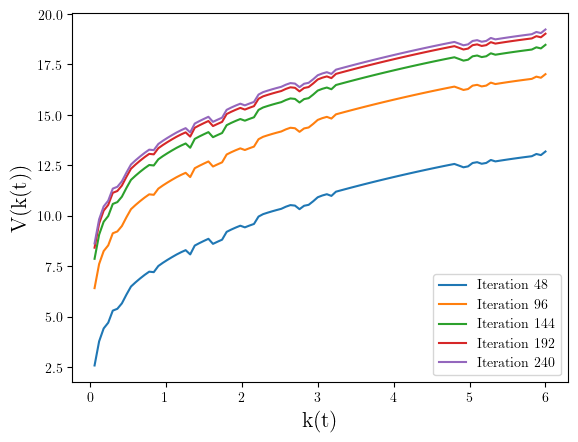

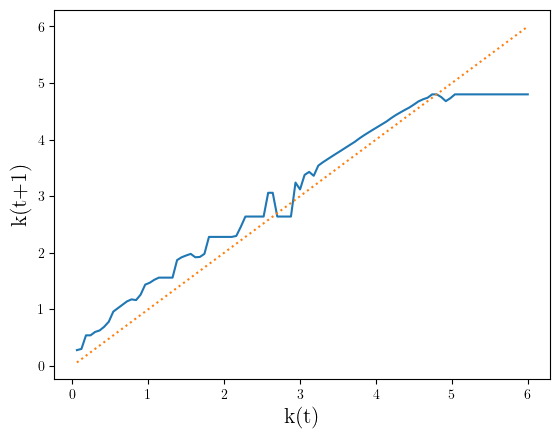

In [7]:
# stochastic RBC model with markov chain
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize_scalar

# latex font
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

# Define global variables
beta = 0.98
delta = 0.1
theta = 0.36
numits = 240

# initialize
vlast = np.zeros(100)
k0 = np.arange(0.06, 6.06, 0.06)
s = np.zeros(T, dtype=int)
A = np.zeros(T)

# 3 states of technology 
amat = np.array([0.9, 1, 1.1])
# Transition matrix
prob = np.array([[0.7, 0.2, 0.1], [0.3, 0.4, 0.3], [0.1, 0.1, 0.8]])


s[0] = 0
A[0] = amat[s[0]]

for t in range(1, T):
    s[t] = np.random.choice([0, 1, 2], p=prob[s[t-1], :])
    A[t] = amat[s[t]]

print(A)

# Function to calculate the value function
def valfun(k): # k as k'
    global vlast, beta, delta, theta, kt, At
    g = np.interp(k, k0, vlast)
    c = At*kt**theta - k + (1 - delta) * kt
    if c <= 0:
        val = -888 - 800 * abs(c)
    else:
        val = np.log(c) + beta * g
    return -val

# Initialize arrays
v = np.zeros(100)
kt1 = np.zeros(100)

# Begin recursive calculations
for its in range(1, numits + 1):
    for j in range(100):
        kt = (j + 1) * 0.06
        At = A[j]
        ktp1 = minimize_scalar(valfun, bounds=(0.01, 6.2), method='bounded').x
        v[j] = -valfun(ktp1)
        kt1[j] = ktp1

    if its % 48 == 0:
        plt.plot(k0, v, label='Iteration ' + str(its))
        plt.xlabel('k(t)', fontsize=16)
        plt.ylabel('V(k(t))', fontsize=16)
        plt.legend()
        plt.draw()

    vlast = v.copy()

#plt.savefig('valuefun.pdf', format='pdf', dpi=1000)
plt.show()

# Plot the policy function
plt.plot(k0, kt1)
plt.plot(k0, k0, ls=':', label='45 degree line')
plt.xlabel('k(t)', fontsize=16)
plt.ylabel('k(t+1)', fontsize=16)
#plt.savefig('policyfun.pdf', format='pdf', dpi=1000)
plt.show()


[1.         0.99858815 0.98608004 0.99408651 0.99640219 1.00083613
 1.00556391 1.01901743 1.04328095 1.02617549 1.01488188 1.02240943
 1.00657466 0.99707039 1.00144975 1.00498488 0.9997848  1.00420545
 0.98504439 0.988813   0.97317457 0.95756289 0.9561402  0.95496871
 0.94206498 0.94517549 0.93850458 0.93335749 0.94332798 0.94142693
 0.93596268 0.93404179 0.93488493 0.92926522 0.94884924 0.94471876
 0.93318815 0.93742673 0.95119746 0.94650251 0.96485738 0.97663039
 0.98979101 0.99993501 0.98332574 0.98714408 1.00622686 1.0126378
 1.00791136 0.98462596 0.99144936 0.9777906  0.97786188 0.98356323
 1.00358259 1.00363337 1.00107307 1.01430145 1.0185104  1.00871012
 1.01680606 1.01710289 1.01421564 1.02304017 1.01421754 1.02236455
 1.02467598 1.02066978 1.01880809 1.02298003 1.03690161 1.03763412
 1.04547767 1.0669985  1.07576375 1.07893241 1.05518403 1.03935653
 1.03626694 1.01551084 1.00728132 1.01675963 1.02774838 1.02652136
 1.01043463 1.00653962 0.99670953 0.996202   0.99859656 0.98471

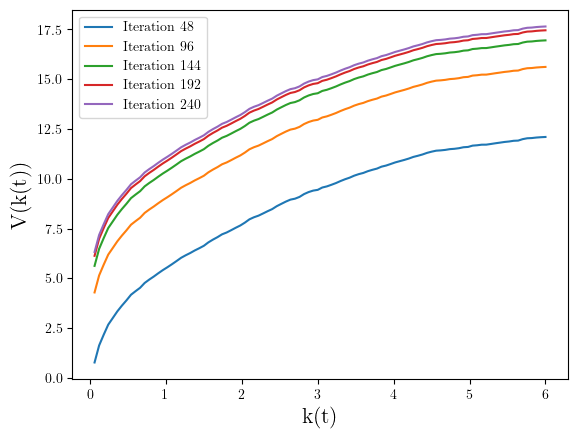

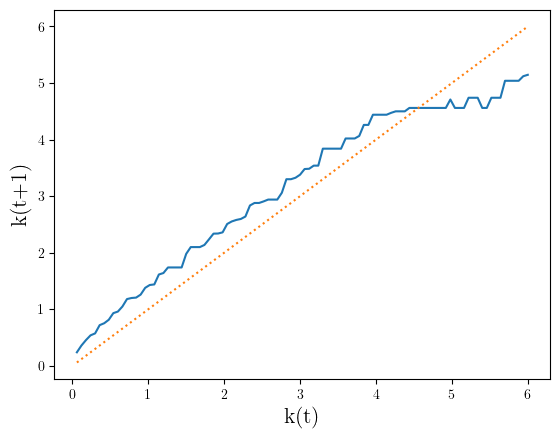

In [5]:
# stochastic RBC model with markov chain
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize_scalar
import random

# latex font
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

# Define global variables
beta = 0.98
delta = 0.1
theta = 0.36
numits = 240

# initialize
vlast = np.zeros(100)
k0 = np.arange(0.06, 6.06, 0.06)

# AR(1) process of technology
rho = 0.95
mu = 0
sigma = 0.01

def inverse_log(y):
    return np.exp(y)

# Simulate the AR(1) process
T = 100
y = np.zeros(T)
A = np.zeros(T)

y[0] = 0
A[0] = inverse_log(y[0])

for t in range(1, T):
    y[t] = rho * y[t-1] + random.normalvariate(mu, sigma)
    A[t] = inverse_log(y[t])

print(A)

# Function to calculate the value function
def valfun(k): # k as k'
    global vlast, beta, delta, theta, kt, At
    g = np.interp(k, k0, vlast)
    c = At*kt**theta - k + (1 - delta) * kt
    if c <= 0:
        val = -888 - 800 * abs(c)
    else:
        val = np.log(c) + beta * g
    return -val

# Initialize arrays
v = np.zeros(100)
kt1 = np.zeros(100)

# Begin recursive calculations
for its in range(1, numits + 1):
    for j in range(100):
        kt = (j + 1) * 0.06
        At = A[j]
        ktp1 = minimize_scalar(valfun, bounds=(0.01, 6.2), method='bounded').x
        v[j] = -valfun(ktp1)
        kt1[j] = ktp1

    if its % 48 == 0:
        plt.plot(k0, v, label='Iteration ' + str(its))
        plt.xlabel('k(t)', fontsize=16)
        plt.ylabel('V(k(t))', fontsize=16)
        plt.legend()
        plt.draw()

    vlast = v.copy()

#plt.savefig('valuefun.pdf', format='pdf', dpi=1000)
plt.show()

# Plot the policy function
plt.plot(k0, kt1)
plt.plot(k0, k0, ls=':', label='45 degree line')
plt.xlabel('k(t)', fontsize=16)
plt.ylabel('k(t+1)', fontsize=16)
#plt.savefig('policyfun.pdf', format='pdf', dpi=1000)
plt.show()
